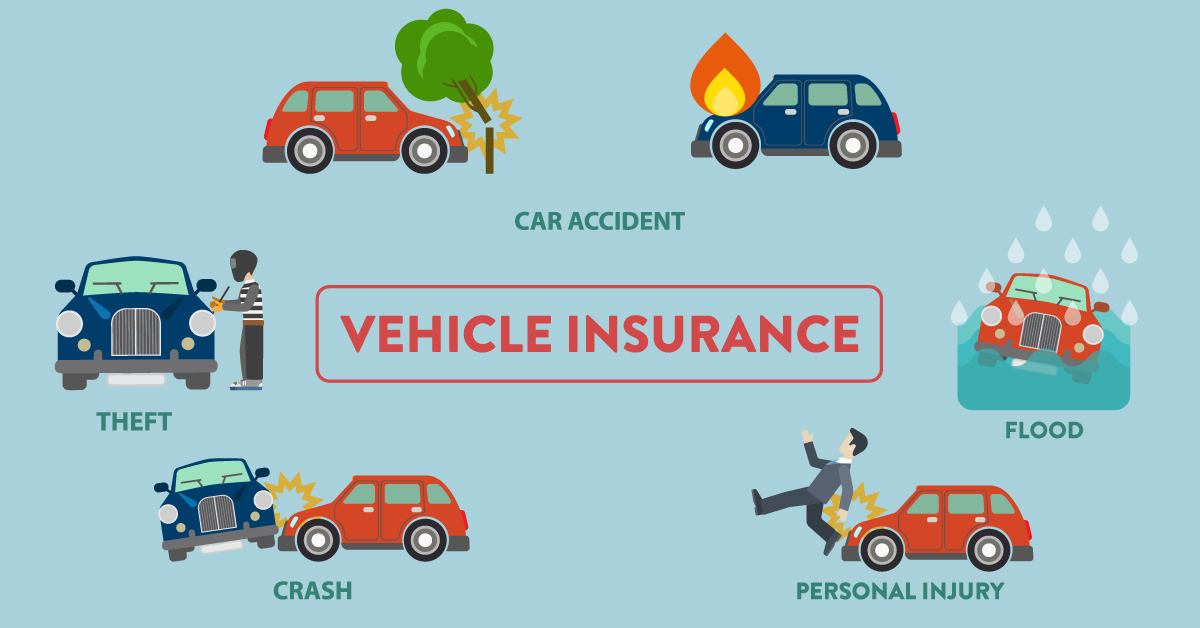

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>
### 1. Exploratory Data Analysis
### 2. Data Modelling and Evaluation

<font size="+2" color=chocolate ><b>Please Upvote my kernel if you like my work.</b></font>

# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# Import Dataset

In [31]:
train=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test=pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.shape

(381109, 12)

# Check for missing values

In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No missing data

<font size="+3" color='#540b11'><b> Exploratory Data Analysis </b></font>

In [6]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [7]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [8]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Target Variable (Response)

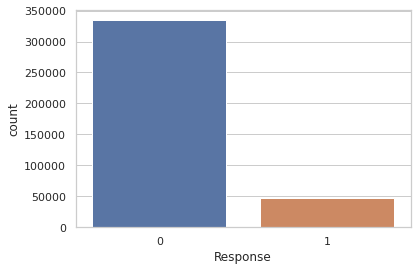

In [9]:
sns.countplot(train.Response)

In [10]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Age Distribution of Customers

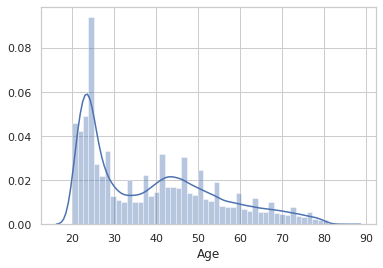

In [11]:
sns.distplot(train.Age)

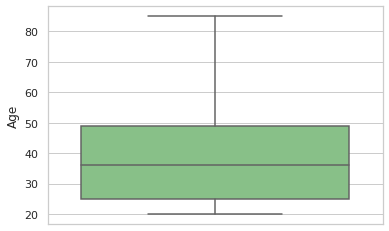

In [12]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

# Age Vs Annual premium 

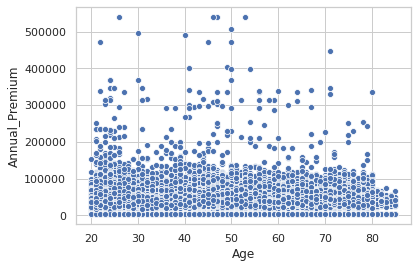

In [13]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

# Gender and Response

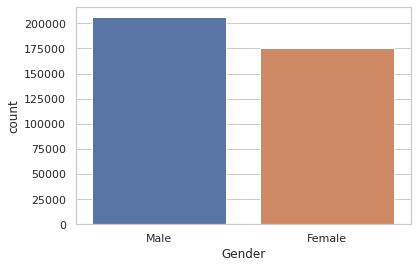

In [14]:
sns.countplot(train.Gender)

In [15]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


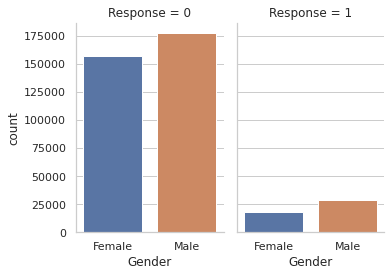

In [16]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Driving license by Gender

In [17]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [18]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


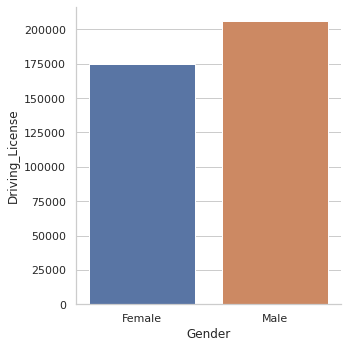

In [19]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

# Customers having Vehicle insurance already

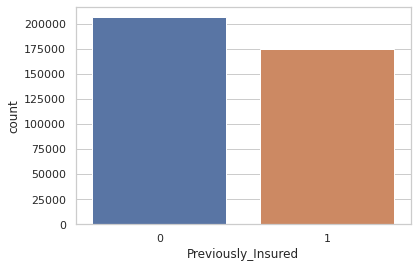

In [20]:
sns.countplot(train.Previously_Insured)

# Vehicle Age 

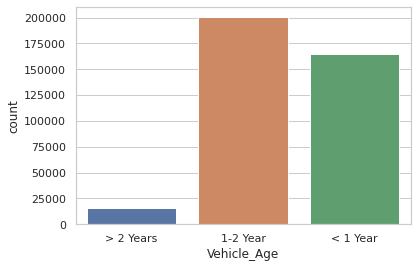

In [21]:
sns.countplot(train.Vehicle_Age)

# Response and Vehicle age

In [22]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


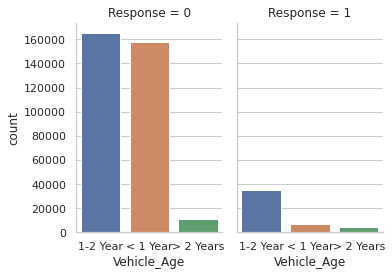

In [23]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Customers having damaged vehicle

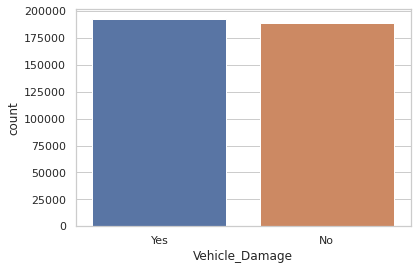

In [24]:
sns.countplot(train.Vehicle_Damage)

# Damage Vehicle and Response

In [25]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

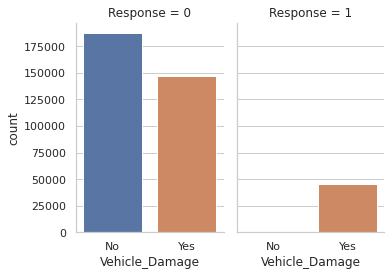

In [26]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Annual Premium Distribution 

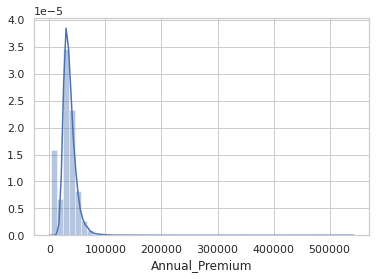

In [27]:
sns.distplot(train.Annual_Premium)

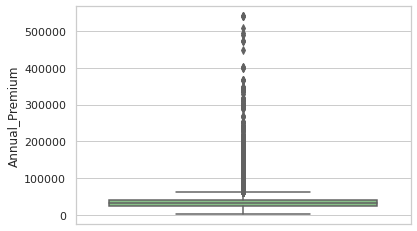

In [28]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

# Vintage

Number of Days, Customer has been associated with the company

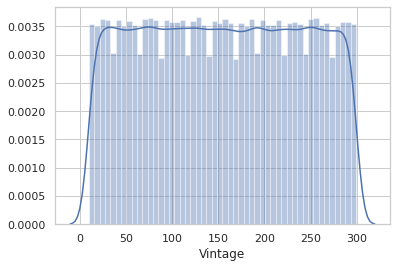

In [29]:
sns.distplot(train.Vintage)

<font size="+3" color='#540b11'><b> Data Preprocessing </b> </font>

In [42]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [32]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [33]:
train=pd.get_dummies(train,drop_first=True)

In [34]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [38]:
train=train.drop('id',axis=1)

In [43]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [45]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [46]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [74]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [65]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [51]:
id=test.id

In [52]:
test=test.drop('id',axis=1)

In [68]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'fmin', 'test', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [349]:
x_train.dtypes

Gender                      int64
Age                         int64
Driving_License             int64
Region_Code               float64
Previously_Insured          int64
Annual_Premium            float64
Policy_Sales_Channel      float64
Vintage                     int64
Vehicle_Age_lt_1_Year       uint8
Vehicle_Age_gt_2_Years      uint8
Vehicle_Damage_Yes          uint8
dtype: object

In [79]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 20.7min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

## Save model

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [82]:
rf_load = pickle.load(open(filename, 'rb'))

# Evaluate Model 

In [83]:
y_pred=model.predict(x_test)

## Classification Report 

In [84]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



## ROC Curve & AUC of Random forest classifier

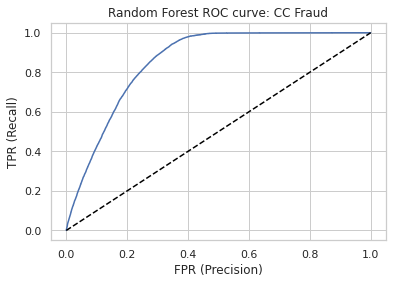

Area under curve (AUC):  0.8551439982187663


In [87]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [88]:
roc_auc_score(y_test, y_score)

0.8551439982187663

# XGBoost Classifier 

In [100]:
for column in cat_feat:
    x_train[column] = x_train[column].astype('int')
    x_test[column] = x_test[column].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [102]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [92]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [93]:
trials = Trials()

In [103]:

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                         
0.8551439982187663                                     
SCORE:                                                 
0.8774428514452445                                     
ROC-AUC Score:                                                                    
0.8551439982187663                                                                
SCORE:                                                                            
0.8774638426499297                                                                
ROC-AUC Score:                                                                    
0.8551439982187663                                                                
SCORE:                                                                            
0.877453347047587                                                                 
ROC-AUC Score:                                                                    
0.8551439982187663           

0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774323558429018                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                      

ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774638426499297                                                          

0.8551439982187663                                                                 
SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.877453347047587                                                                  
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.8774428514452445                                                                 
ROC-AUC Score:                                                              

SCORE:                                                                             
0.877453347047587                                                                  
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.877453347047587                                                                  
ROC-AUC Score:                                                                     
0.8551439982187663                                                                 
SCORE:                                                                             
0.877453347047587                                                                  
100%|██████████| 100/100 [29:28<00:00, 17.69s/trial, best loss: -0.8551439982187663]


In [104]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9315329293311101, 'gamma': 1.8461594224258304, 'max_depth': 5.0, 'min_child_weight': 4.0, 'reg_alpha': 126.0, 'reg_lambda': 0.49150384106319067}


In [65]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = best, gamma = 4.0388607178326605, reg_lambda = 0.26955899476862166,
                            reg_alpha = 66.0, min_child_weight=4.0,colsample_bytree = 0.8844758548525424 )
    

In [66]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8844758548525424,
              gamma=4.0388607178326605, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=66.0,
              reg_lambda=0.26955899476862166, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

## ROC Curve & AUC of XG boost classifier

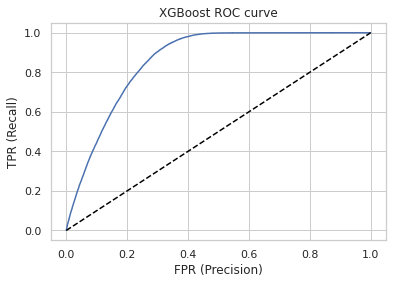

Area under curve (AUC):  0.8610552123033075


In [68]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [70]:
random_state=42
n_iter=50
num_folds=2
kf = KFold(n_splits=num_folds, random_state=random_state,shuffle=True)

In [127]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=x_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate'],
              'gamma': params['gamma'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'colsample_bytree' : params['colsample_bytree'],
              'min_child_weight' : params['min_child_weight']
             }
            
            
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMClassifier(random_state=42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()

    return score

In [158]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1),
       'learning_rate': hp.loguniform("learning_rate",-4,-1),
        'gamma': hp.quniform('gamma',0.1,0.5,0.1),
        'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1),
        'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = lgb.LGBMClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']),learning_rate=best['learning_rate'],gamma=best['gamma'],
                           reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'],colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model.fit(x_train,y_train)

preds = [pred[1] for pred in model.predict_proba(x_test)]
score = roc_auc_score(y_test, preds, average = 'weighted')


100%|██████████| 50/50 [06:38<00:00,  7.96s/trial, best loss: -0.8681365692828988]
CPU times: user 17.4 s, sys: 1.7 s, total: 19.2 s
Wall time: 6min 45s


In [159]:
best

{'colsample_bytree': 0.48944638171094995,
 'gamma': 0.4,
 'learning_rate': 0.3597338813116028,
 'max_depth': 7.0,
 'min_child_weight': 2.0,
 'n_estimators': 192.0,
 'reg_alpha': 1.2000000000000002,
 'reg_lambda': 1.1374081667346767}

In [160]:
print("auc-roc score on Test data",score)

auc-roc score on Test data 0.8680941572226264


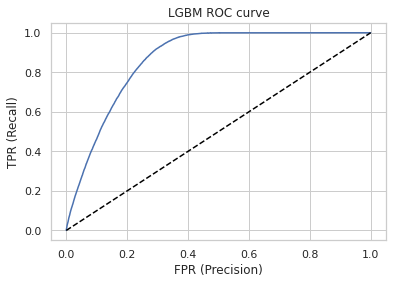

Area under curve (AUC):  0.8680941572226264


In [161]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('LGBM ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# CatBoost 

In [69]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, cat_features = cat_feat, eval_set = (x_test, y_test), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

Learning rate set to 0.128106
0:	learn: 0.5320867	test: 0.5323419	best: 0.5323419 (0)	total: 412ms	remaining: 6m 52s
100:	learn: 0.2630644	test: 0.2639867	best: 0.2639855 (98)	total: 27.8s	remaining: 4m 7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2639346435
bestIteration = 114

Shrink model to first 115 iterations.
Validation ROC AUC Score: 0.8590208208720521


# Evaluating on Test data

## Catboost

In [77]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,-0.890089,1,11.0,1,0.070633,152.0,-1.211054,1,0,0
1,1,0.079795,1,28.0,0,0.066321,7.0,-0.517782,0,0,1
2,1,0.532408,1,28.0,0,0.079717,124.0,0.534079,0,0,1
3,1,-0.954748,1,27.0,1,0.073978,152.0,0.390643,1,0,1
4,1,-0.760771,1,28.0,1,0.120293,152.0,1.705469,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,0,-0.825430,1,37.0,1,0.060154,152.0,-1.175195,1,0,0
127033,0,-0.049523,1,28.0,0,0.055538,122.0,0.127678,0,0,1
127034,1,-1.148725,1,46.0,1,0.057885,152.0,-0.960042,1,0,0
127035,1,2.084224,1,28.0,1,0.128341,26.0,1.322974,0,0,0


In [75]:
Preds = [pred[1] for pred in cat_model.predict_proba(test)]

In [76]:
submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
submission.to_csv('vehicle_insurance_catboost.csv', index = False)
submission.head()

,id,Response
0,381110,0.000269
1,381111,0.303041
2,381112,0.292329
3,381113,0.007213
4,381114,0.000188


## LGBM 

In [ ]:
id=test.id
#test.drop(['id'],axis=1,inplace=True)

In [97]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

In [162]:
Preds = [pred[1] for pred in model.predict_proba(test)]

In [163]:
submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
submission.to_csv('vehicle_insurance.csv', index = False)
submission.head()

,id,Response
0,381110,0.001377
1,381111,0.799187
2,381112,0.768010
3,381113,0.063009
4,381114,0.004429


<font size="+1" color='blue'><b> I hope you enjoyed this kernel , Please don't forget to appreciate me with an Upvote.</b></font>

<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">